In [1]:
import numpy as np
from skimage import io
import matplotlib.pyplot as plt
from dipy.segment.clustering import QuickBundles
from dipy.segment.metric import IdentityFeature
from dipy.segment.metric import EuclideanMetric
from dipy.tracking.streamline import Streamlines
from dipy.segment.metric import Metric
import os
import shutil

C:\Users\gurjaspal\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
class ColorMetric(Metric):
    """ Computes the cosine distance between two streamlines. """
    def __init__(self):
       # For simplicity, features will be the vector between endpoints of a streamline.
       super(ColorMetric, self).__init__(feature=IdentityFeature())

    def are_compatible(self, shape1, shape2):
        """ Checks if two features are vectors of same dimension.

        Basically this method exists so we don't have to do this check
        inside the `dist` method (speedup).
        """
        return shape1 == shape2 and shape1[0] == 1

    def dist(self, v1, v2):
        """ Computes a the cosine distance between two vectors. """
        return np.sqrt((v1[0]-v2[0])**2+(v1[1]-v2[1])**2+(v1[2]-v2[2])**2)

In [3]:
s  = Streamlines()
for i in range(1,5000):
    im = io.imread('new_partitions/partition'+ str(i) + '.jpg')
    #partition_list.append(im)
    s.append(np.ascontiguousarray(im.reshape(2500,3)))

In [4]:
im = io.imread('partitions/partition'+ str(1) + '.jpg')
im.reshape(2500,3)

array([[ 87,  84,  69],
       [ 73,  86,  94],
       [ 42,  83, 115],
       ...,
       [  0,   0,   0],
       [  0,   0,   0],
       [  0,   0,   0]], dtype=uint8)

In [26]:
# 363367
metric = EuclideanMetric()
qb = QuickBundles(threshold=433367,metric=metric)
clusters = qb.cluster(s)

print(len(clusters))

6


(50, 50, 3)


363367.30777220754

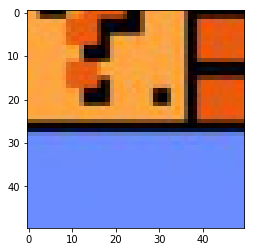

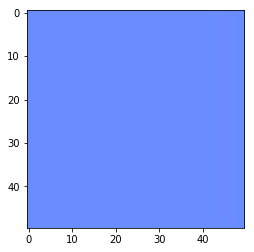

In [21]:
image1 = 2521
image2 = 2519
print(s[image1].reshape(50,50,3).shape)
plt.figure()
plt.imshow(s[image1].reshape(50,50,3))
plt.figure()
plt.imshow(s[image2].reshape(50,50,3))
metric.dist(np.float32(s[image1]),np.float32(s[image2])) 

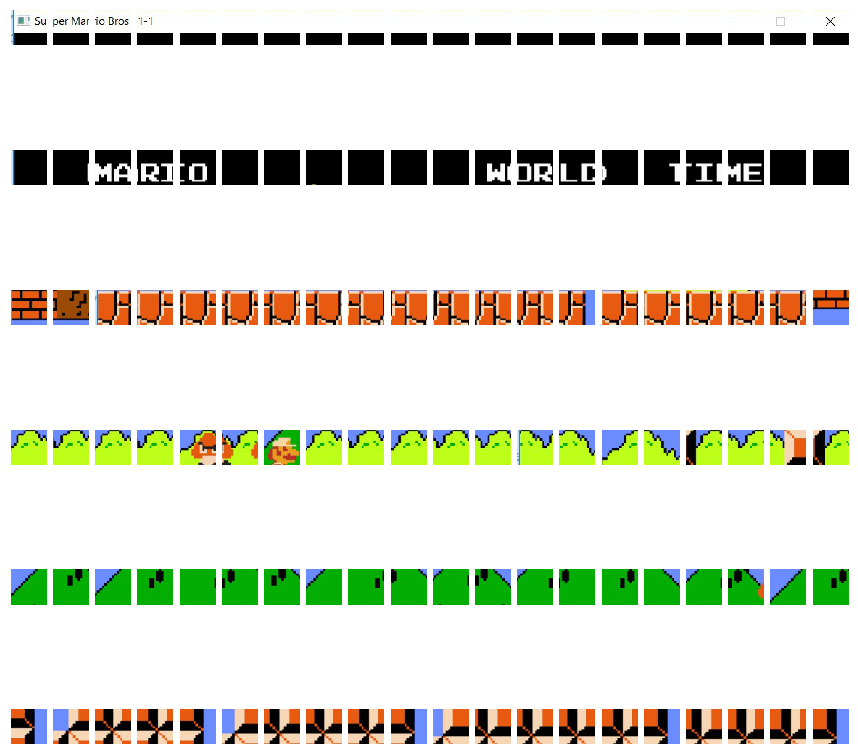

In [27]:
row = 0
fig, ax = plt.subplots(len(clusters),20,figsize=(15,15))
show_images_count = 20
for cluster in clusters:
#     print("next cluster"
    
    if len(cluster) < show_images_count:
        for index in range(len(cluster)):
            image = cluster[index].reshape(50,50,3)
#             plt.subplots(row, 10, index+1)
            ax[row,index].axis('off')
            ax[row,index].xaxis.set_ticklabels([])
            ax[row,index].yaxis.set_ticklabels([])
            ax[row,index].imshow(image)
    else:
        for index in range(show_images_count):
            image = cluster[index].reshape(50,50,3)
#             print(cluster[index].shape)
            ax[row,index].xaxis.set_ticklabels([])
            ax[row,index].yaxis.set_ticklabels([])
#             plt.subplots(row,10,index+1)
            ax[row,index].axis('off')
            ax[row,index].imshow(image)
    row += 1
        

In [28]:
print(len(clusters))

6


In [29]:
# function to save the all the images in clusters formed

def save_clusters(clusters):
    if os.path.exists('cluster'):
        shutil.rmtree('cluster')
    for row, cluster in enumerate(clusters):
        path = 'cluster/cluster'+str(row)
#         os.mkdir('cluster')
        os.makedirs(path)
        for index,image in enumerate(cluster):
            plt.imsave(path + '/image'+str(index), image.reshape(50,50,3))
save_clusters(clusters)

In [ ]:


#im = io.imread('partitions/partition'+ str(1) + '.jpg', as_grey=True)


#my_data = [200*np.random.rand(1, 3),
#        50*np.random.rand(1, 3),
#        10*np.random.rand(1, 3)] 
#my_data = np.array(my_data)

#class DataSequence:
#    def __init__(self, data):
#
#        self.data = data
#
#    def __getitem__(self, i):
#        return self.data[i][None, :]
#        #return self.data[i]
#
#    def __len__(self):
#        return self.data.shape[0]

#class DMetric(Metric):
#    """ Computes the cosine distance between two streamlines. """
#    def __init__(self):
#        # For simplicity, features will be the vector between endpoints of a streamline.
#        super(DMetric, self).__init__(feature=IdentityFeature())
#
#    def are_compatible(self, shape1, shape2):
#        """ Checks if two features are vectors of same dimension.
#
#        Basically this method exists so we don't have to do this check
#        inside the `dist` method (speedup).
#        """
#        return shape1 == shape2 and shape1[0] == 1
#
#    def dist(self, v1, v2):
#        """ Computes a the cosine distance between two vectors. """
#        return np.sum((v1 [0-v2)**2)
#continuous
#dataseq = DataSequence(s)

#vector_feature = IdentityFeature()
#metric = EuclideanMetric(feature=vector_feature)





    
    

#print(len(partition_list))
#qb = QuickBundles(threshold = 3.)
#clusters = qb.cluster(partition_list)
#print(len(clusters))